## Obsession and COmpulsion BERT Model. 

# The Models trained in dataset that labelled by both ontology and manual labelling.  

In [4]:
pip install contractions

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/areejnasser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/areejnasser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/areejnasser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from tensorflow.keras.preprocessing.text import Tokenizer

2024-01-15 09:38:12.188451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Cleaning data

In [12]:
import re
#define the process of text cleaning
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

#Clean Text
def clean_text(data):
    # convert catacter to lowercase
    data['clean_text']=data['yy'].str.lower()
    #remove URLS
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
    #remove ponctuation
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
    #remove
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
    #remove degits
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
    #remove emojis
    data['clean_text'] = data['clean_text'].apply(lambda elem:deEmojify(elem))
    #remove multiple spaces
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
    #remove single caracter
    data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
    return data

def process_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Handle contractions using the contractions library
    expanded_text = contractions.fix(text)

    # Lowercasing
    expanded_text = expanded_text.lower()

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Removing Punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Removing Stop Words
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [7]:
# Dataset with Ontology Label 
df = pd.read_csv('/Users/areejnasser/Desktop/new_model/combined_ontology_enriched.csv')
df


,post,prefLabel,obsession,compulsion,mergedAnnotations
0,Hi -\nSo I haven't been on here since December...,"['depression', 'weight gain', 'Medication', 'a...",1.0,0.0,NaN
1,"Hi all, hope you're all having a wonderful ban...","['compulsion', 'anger', 'symptom', 'compassion...",1.0,1.0,NaN
2,"Hi, \nFirst, I hope everyone managed to have s...","['hope', 'happiness', 'guilt', 'fear', 'obsess...",1.0,0.0,NaN
3,Hello everyone. I could really use your help r...,"['Treatment', 'hope', 'Thought', 'obsession', ...",1.0,0.0,NaN
4,"Though it comes in many flavors, one of the mo...","['quality', 'Intrusive thoughts', 'fall', 'beh...",1.0,1.0,NaN
...,...,...,...,...,...
11261,Hi.\nMy name is Anar. I'm from Republic of Aze...,"['wasting', 'washing hands', 'checking', 'shav...",NaN,1.0,"['garage', 'washing hands', 'shaving', 'wastin..."
11262,Its just over a year since my latest OCD theme...,"['Thought', 'fear', 'OCD']",1.0,NaN,"['fear', 'Thought', 'spike', 'theme', 'OCD']"
11263,When I go for cbt with core mental health team...,"['writing', 'OCD', 'Rituals']",NaN,1.0,"['writing', 'Rituals', 'OCD']"
11264,Am moaning again but could do with some inspir...,"['OCD', 'Rituals', 'arthritis']",NaN,1.0,"['arthritis', 'Rituals', 'OCD']"


In [8]:
df['post'] = df['post'].fillna('')
df['post'] = df['post'].apply(process_text)
df.head()


,post,prefLabel,obsession,compulsion,mergedAnnotations
0,hi since december since recovering prozac sinc...,"['depression', 'weight gain', 'Medication', 'a...",1.0,0.0,NaN
1,hi hope wonderful bank holiday whatever howeve...,"['compulsion', 'anger', 'symptom', 'compassion...",1.0,1.0,NaN
2,hi first hope everyone managed joy happiness c...,"['hope', 'happiness', 'guilt', 'fear', 'obsess...",1.0,0.0,NaN
3,hello everyone could really use help right ide...,"['Treatment', 'hope', 'Thought', 'obsession', ...",1.0,0.0,NaN
4,though come many flavor one common ocd theme s...,"['quality', 'Intrusive thoughts', 'fall', 'beh...",1.0,1.0,NaN


In [42]:
# Impute NaN values in 'obsession' column with 0
df['obsession'].fillna(0, inplace=True)
# Impute NaN values in 'obsession' column with 0
df['compulsion'].fillna(0, inplace=True)


In [63]:

# Count number of posts with label 1 and 0 for each class
obsession_label_counts = df['obsession'].value_counts()
compulsion_label_counts = df['compulsion'].value_counts()

obsession_label_counts, compulsion_label_counts



(1.0    5917
 0.0    5349
 Name: obsession, dtype: int64,
 0.0    7849
 1.0    3417
 Name: compulsion, dtype: int64)

In [8]:
# Dataset with manual and ontology (enrichment) label  
df1 = pd.read_csv('/Users/areejnasser/Desktop/model_ontologyANDmanualLabel/merged_annotations_500 2.csv')
df1 

,post,prefLabel,obsession_first_checker,obsession_second_checker,obsession_third_checker,compulsion_first_checker,compulsion_second_checker,compulsion_third_checker,postAnnotations,mergedAnnotations,Compulsion exp,Obsession exp
0,"I grew up with obsessive thoughts, or more apt...","['site', 'compulsion', 'obsession', 'rash', 'p...",1,1,1,1,1,1.0,"['rape', 'violent', 'distressing', ‘repulsive'...","['rape', 'violent', 'hand', 'distressing', 'ob...",1.0,1.0
1,I have been thinking so much about Covid becau...,"['singing', 'washing hands', 'anxiety', 'anxie...",1,1,1,1,1,0.0,"['washing', 'irrational', 'thought', 'hand']","['ocd', 'anxiety', 'fear', 'washing', 'washing...",NaN,NaN
2,"I fed up, I send all day checking excessive ch...","['OCD', 'checking', 'Thought']",1,1,1,1,1,1.0,"['irrational', 'thought', 'excessive checking']","['ocd', 'excessive checking', 'checking', 'irr...",1.0,1.0
3,I’ve noticed that I’ve been washing my hands m...,"['washing hands', 'hope', 'depression', 'OCD']",1,0,0,1,1,1.0,"['washing', 'irrational', 'hand']","['ocd', 'washing', 'depression', 'irrational',...",NaN,NaN
4,This sounds so stupid\nAt the moment I want to...,['Thought'],1,1,1,1,0,0.0,['thought'],['thought'],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
494,https://itunes.apple.com/gb/podcast/dhamma-tal...,"['interest', 'Thought', 'OCD', 'cognitive proc...",0,0,0,0,0,0.0,['thought'],"['ocd', 'cognitive process', 'interest', 'thou...",NaN,NaN
495,Hi all\nThere are lots of helpful topics on th...,['OCD'],0,0,0,0,0,0.0,[],['ocd'],NaN,NaN
496,"aww guys i am sorry , i feel that i am always ...","['OCD', 'sadness', 'weakness', 'anxiety', 'anx...",0,0,0,0,0,0.0,['hand'],"['weakness', 'ocd', 'depression', 'anxiety', '...",NaN,NaN
497,My name is Ian I have suffered with OCD for mo...,"['OCD', 'hope', 'fear']",1,1,0,0,0,0.0,[],"['ocd', 'hope', 'fear']",NaN,NaN


In [9]:
# Counting the number of posts that have '1' in both 'obsession_first_checker' and 'obsession_second_checker' columns
count_agreed_1 = df1[(df1['obsession_first_checker'] == 1) & (df1['obsession_second_checker'] == 1)].shape[0]
count_agreed_2 = df1[(df1['obsession_first_checker'] == 0) & (df1['obsession_second_checker'] == 0)].shape[0]
# Count the number of posts with label 1 in the 'Obsession exp' column
obsession_exp_count = df1[df1['Obsession exp'] == 1].shape[0]


count_agreed_1, count_agreed_2, obsession_exp_count


(162, 323, 39)

In [10]:
# Apply the condition and create the 'agreed_obsession_label' column
df1['agreed_obsession_label'] = (
    ((df1['obsession_first_checker'] == 1) & (df1['obsession_second_checker'] == 1)) | 
    (df1['Obsession exp'] == 1)
).astype(int)

# Apply the condition and create the 'agreed_compulsion_label' column
df1['agreed_compulsion_label'] = (
    ((df1['compulsion_first_checker'] == 1) & (df1['compulsion_second_checker'] == 1)) | 
    (df1['Compulsion exp'] == 1)
).astype(int)

# Now, calculate the count for each label
label_1_obsession = df1[df1['agreed_obsession_label'] == 1].shape[0]
label_0_obsession = df1[df1['agreed_obsession_label'] == 0].shape[0]

label_1_compulsion = df1[df1['agreed_compulsion_label'] == 1].shape[0]
label_0_compulsion = df1[df1['agreed_compulsion_label'] == 0].shape[0]

print("Obsession Label 1 Count:", label_1_obsession)
print("Obsession Label 0 Count:", label_0_obsession)
print("Compulsion Label 1 Count:", label_1_compulsion)
print("Compulsion Label 0 Count:", label_0_compulsion)


Obsession Label 1 Count: 173
Obsession Label 0 Count: 326
Compulsion Label 1 Count: 48
Compulsion Label 0 Count: 451


In [13]:
# Select the first 500 rows
df_subset = df1.head(500).copy()

# Clean the 'post' column
df_subset['post'] = df_subset['post'].fillna('')
df_subset['post'] = df_subset['post'].apply(process_text)

# Filter rows where 'obsession_first_checker' has labels 0 or 1
filtered_df = df_subset[df_subset['agreed_obsession_label'].isin([0, 1])].copy()

# Filter rows where 'obsession_first_checker' has labels 0 or 1
filtered_df = df_subset[df_subset['agreed_compulsion_label'].isin([0, 1])].copy()

# Save the cleaned dataset to a new CSV file
filtered_df.to_csv('manual_500_enrichOntology_aggrement.csv', index=False)

# Display the first few rows of the updated DataFrame
print(filtered_df.head())


                                                post  \
0  grew obsessive thought aptly intrusive thought...   
1  thinking much covid part job well right concer...   
2  fed send day checking excessive checking every...   
3  noticed washing hand lately thing triggering n...   
4  sound stupid moment want download window live ...   

                                           prefLabel  obsession_first_checker  \
0  ['site', 'compulsion', 'obsession', 'rash', 'p...                        1   
1  ['singing', 'washing hands', 'anxiety', 'anxie...                        1   
2                     ['OCD', 'checking', 'Thought']                        1   
3     ['washing hands', 'hope', 'depression', 'OCD']                        1   
4                                        ['Thought']                        1   

   obsession_second_checker  obsession_third_checker  \
0                         1                        1   
1                         1                        1   
2       

In [15]:
# Count the number of posts with label 1 and label 0 in 'agreed_obsession_label'
label_1_count = filtered_df[filtered_df['agreed_obsession_label'] == 1].shape[0]
label_0_count = filtered_df[filtered_df['agreed_obsession_label'] == 0].shape[0]

# Count the number of posts with label 1 and label 0 in 'agreed_obsession_label'
label_1_count_com = filtered_df[filtered_df['agreed_compulsion_label'] == 1].shape[0]
label_0_count_com = filtered_df[filtered_df['agreed_compulsion_label'] == 0].shape[0]

label_1_count, label_0_count, label_1_count_com, label_0_count_com

(173, 326, 48, 451)

In [39]:
len(filtered_df)

499

## Training and Testing

In [11]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(df, test_size=test_split, stratify=df[['obsession']].values, )
test_df,val_df = train_test_split(test_df,test_size=0.5,stratify=test_df[['obsession']].values)
# Splitting the test set further into validation and new test sets.
# val_df = test_df.sample(frac=0.5)
# test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 9012
Number of rows in validation set: 1127
Number of rows in test set: 1127


In [12]:
train_x,train_y = train_df['post'], train_df[['obsession']]
test_x,test_y = test_df['post'], test_df[['obsession']]
val_x,val_y = val_df['post'], val_df[['obsession']]

In [13]:
# Count the number of labels as 0 and 1 for each group
print("Training set:")
print(train_y['obsession'].value_counts())

print("\nValidation set:")
print(val_y['obsession'].value_counts())

print("\nTest set:")
print(test_y['obsession'].value_counts())


Training set:
1.0    4733
0.0    4279
Name: obsession, dtype: int64

Validation set:
1.0    592
0.0    535
Name: obsession, dtype: int64

Test set:
1.0    592
0.0    535
Name: obsession, dtype: int64


## Cross-Validation BERT Model for (Ontology with Enrichment) Labelled Dataset

In [64]:
#okenize and Encode the Entire Dataset: You need to tokenize and encode your entire dataset (not split into train/test/val) since cross-validation will involve creating multiple such splits internally.
full_encodings = tokenizer(df['post'].tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
full_labels = tf.convert_to_tensor(df[['obsession']], dtype=tf.int32)


In [65]:
#Convert Encodings to Numpy Arrays: This is necessary for compatibility with cross-validation functions.
full_encodings = {key: np.array(value) for key, value in full_encodings.items()}


In [69]:
from sklearn.model_selection import KFold
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data preparation
posts = df['post'].tolist()
labels = df['obsession'].tolist()  # Replace with 'combined_compulsion' if analyzing compulsion

# Tokenize the data
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
full_encodings = tokenizer(posts, truncation=True, padding=True, max_length=128, return_tensors='np')

# Convert labels to numpy array
full_labels = np.array(labels)

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
accuracy_scores = []
loss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define an early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

for fold, (train_index, val_index) in enumerate(kf.split(full_encodings['input_ids'])):
    # Split the data
    train_encodings = {key: value[train_index] for key, value in full_encodings.items()}
    train_labels = full_labels[train_index]
    val_encodings = {key: value[val_index] for key, value in full_encodings.items()}
    val_labels = full_labels[val_index]

    # Load BERT model
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Train the model with early stopping
    history = model.fit(train_encodings, train_labels, 
                        validation_data=(val_encodings, val_labels), 
                        epochs=4, batch_size=32,
                        callbacks=[early_stopping_callback])

    # Evaluate the model on the validation set
    val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_encodings, val_labels)
    accuracy_scores.append(val_accuracy)
    loss_scores.append(val_loss)
    precision_scores.append(val_precision)
    recall_scores.append(val_recall)
    f1_scores.append(2 * (val_precision * val_recall) / (val_precision + val_recall))

    # Plotting the learning curves for each fold
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Learning Curves for Fold {fold+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Display overall results
print("Cross-Validation Results:")
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Loss:", np.mean(loss_scores))
print("Average Precision:", np.model.save_pretrained('/Users/areejnasser/Desktop/cross-val')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
282/282 [==============================] - 3644s 13s/step - loss: 0.3580 - accuracy: 0.8327 - val_loss: 0.1801 - val_accuracy: 0.9268
Epoch 2/3
282/282 [==============================] - 3403s 12s/step - loss: 0.1307 - accuracy: 0.9511 - val_loss: 0.1582 - val_accuracy: 0.9401
Epoch 3/3
71/71 [==============================] - 260s 4s/step - loss: 0.1908 - accuracy: 0.9414
Fold 1 - Accuracy: 0.9414374232292175


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
282/282 [==============================] - 3411s 12s/step - loss: 0.3617 - accuracy: 0.8399 - val_loss: 0.1518 - val_accuracy: 0.9467
Epoch 2/3
282/282 [==============================] - 3335s 12s/step - loss: 0.1555 - accuracy: 0.9414 - val_loss: 0.1330 - val_accuracy: 0.9516
Epoch 3/3
71/71 [==============================] - 257s 4s/step - loss: 0.1329 - accuracy: 0.9530
Fold 2 - Accuracy: 0.9529516100883484


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
282/282 [==============================] - 3338s 12s/step - loss: 0.3126 - accuracy: 0.8644 - val_loss: 0.1606 - val_accuracy: 0.9441
Epoch 2/3
282/282 [==============================] - 3306s 12s/step - loss: 0.1368 - accuracy: 0.9503 - val_loss: 0.1394 - val_accuracy: 0.9476
Epoch 3/3
71/71 [==============================] - 249s 4s/step - loss: 0.1425 - accuracy: 0.9467
Fold 3 - Accuracy: 0.9467377066612244


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
282/282 [==============================] - 3332s 12s/step - loss: 0.3300 - accuracy: 0.8501 - val_loss: 0.1671 - val_accuracy: 0.9365
Epoch 2/3
282/282 [==============================] - 3295s 12s/step - loss: 0.1402 - accuracy: 0.9467 - val_loss: 0.1460 - val_accuracy: 0.9441
Epoch 3/3
71/71 [==============================] - 250s 4s/step - loss: 0.1451 - accuracy: 0.9458
Fold 4 - Accuracy: 0.9458499550819397


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
282/282 [==============================] - 3358s 12s/step - loss: 0.3608 - accuracy: 0.8349 - val_loss: 0.1809 - val_accuracy: 0.9321
Epoch 2/3
282/282 [==============================] - 3619s 13s/step - loss: 0.1402 - accuracy: 0.9471 - val_loss: 0.1352 - val_accuracy: 0.9454
Epoch 3/3
71/71 [==============================] - 273s 4s/step - loss: 0.1559 - accuracy: 0.9436
Fold 5 - Accuracy: 0.9436306953430176
Cross-Validation Results:
Average Accuracy: 0.9461214780807495
Average Loss: 0.15343908965587616


## Evaluation Using Manual label Dataset / Aggrement between two annotator + data labelled by the Ontology (enrichment)


# Combining Ontology's and Manual Label Dataset

In [79]:
# Combining the post columns from both dataframes and dropping duplicates
combined_posts = pd.concat([df['post'], df1['post']]).drop_duplicates().reset_index(drop=True)

# Merging the obsession and compulsion columns from df and agreed labels from df1 into one DataFrame
combined_df = combined_posts.to_frame().merge(df[['post', 'obsession', 'compulsion']], on='post', how='left')
combined_df = combined_df.merge(df1[['post', 'agreed_obsession_label', 'agreed_compulsion_label']], on='post', how='left')

# Merge 'obsession' and 'agreed_obsession_label' as well as 'compulsion' and 'agreed_compulsion_label' into single columns
combined_df['obsession'] = combined_df[['obsession', 'agreed_obsession_label']].bfill(axis=1).iloc[:, 0]
combined_df['compulsion'] = combined_df[['compulsion', 'agreed_compulsion_label']].bfill(axis=1).iloc[:, 0]

# Dropping the agreed label columns as they are no longer needed
combined_df.drop(columns=['agreed_obsession_label', 'agreed_compulsion_label'], inplace=True)

combined_df

,post,obsession,compulsion
0,hi since december since recovering prozac sinc...,1.0,0.0
1,hi hope wonderful bank holiday whatever howeve...,1.0,1.0
2,hi first hope everyone managed joy happiness c...,1.0,0.0
3,hello everyone could really use help right ide...,1.0,0.0
4,though come many flavor one common ocd theme s...,1.0,1.0
...,...,...,...
11760,https://itunes.apple.com/gb/podcast/dhamma-tal...,0.0,0.0
11761,Hi all\nThere are lots of helpful topics on th...,0.0,0.0
11762,"aww guys i am sorry , i feel that i am always ...",0.0,0.0
11763,My name is Ian I have suffered with OCD for mo...,1.0,0.0


In [80]:
obsession_counts = combined_df['obsession'].value_counts()
compulsion_counts = combined_df['compulsion'].value_counts()

obsession_counts, compulsion_counts

(1.0    6090
 0.0    5675
 Name: obsession, dtype: int64,
 0.0    8300
 1.0    3465
 Name: compulsion, dtype: int64)

In [86]:
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data preparation
posts = combined_df['post'].tolist()
labels = combined_df['obsession'].tolist()  # Replace 'obsession' with 'compulsion' if needed

# Tokenize the data
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encodings = tokenizer(posts, truncation=True, padding=True, max_length=128, return_tensors='np')

# Convert labels to numpy array
labels_np = np.array(labels)

# Split data into training and test sets
train_encodings, test_encodings, train_labels, test_labels = train_test_split(encodings['input_ids'], labels_np, test_size=0.2, random_state=42)

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
accuracy_scores = []
loss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(train_encodings)):
    # Split the data for this fold
    train_fold_encodings = {'input_ids': train_encodings[train_index]}
    val_fold_encodings = {'input_ids': train_encodings[val_index]}
    train_fold_labels = train_labels[train_index]
    val_fold_labels = train_labels[val_index]

    # Load BERT model
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Train the model
    history = model.fit(train_fold_encodings, train_fold_labels, validation_data=(val_fold_encodings, val_fold_labels), epochs=4, batch_size=32)

    # Evaluate the model on the validation set
    val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_fold_encodings, val_fold_labels)
    accuracy_scores.append(val_accuracy)
    loss_scores.append(val_loss)
    precision_scores.append(val_precision)
    recall_scores.append(val_recall)
    f1_scores.append(2 * (val_precision * val_recall) / (val_precision + val_recall))

# Print average scores across all folds
print("Cross-Validation Results:")
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Loss:", np.mean(loss_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1-Score:", np.mean(f1_scores))

# Prepare test set
test_encodings = {'input_ids': test_encodings}

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_encodings, test_labels)
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

# Print test set scores
print("Test Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1_score}")

# Save the fine-tuned model
model.save_pretrained('/Users/areejnasser/Desktop/cross-val 2')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 3062s 13s/step - loss: 0.4296 - accuracy: 0.7816 - precision_7: 0.8380 - recall_7: 0.7162 - val_loss: 0.1598 - val_accuracy: 0.9389 - val_precision_7: 0.9550 - val_recall_7: 0.9269
Epoch 2/4
236/236 [==============================] - 2812s 12s/step - loss: 0.1746 - accuracy: 0.9255 - precision_7: 0.9580 - recall_7: 0.8952 - val_loss: 0.1288 - val_accuracy: 0.9426 - val_precision_7: 0.9782 - val_recall_7: 0.9107
Epoch 3/4
236/236 [==============================] - 2661s 11s/step - loss: 0.1483 - accuracy: 0.9398 - precision_7: 0.9624 - recall_7: 0.9196 - val_loss: 0.1211 - val_accuracy: 0.9453 - val_precision_7: 0.9632 - val_recall_7: 0.9310
Epoch 4/4
59/59 [==============================] - 204s 3s/step - loss: 0.1511 - accuracy: 0.9437 - precision_7: 0.9364 - recall_7: 0.9574


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2580s 11s/step - loss: 0.5358 - accuracy: 0.7061 - precision_8: 0.7345 - recall_8: 0.6795 - val_loss: 0.3523 - val_accuracy: 0.8534 - val_precision_8: 0.9232 - val_recall_8: 0.7804
Epoch 2/4
236/236 [==============================] - 2860s 12s/step - loss: 0.2216 - accuracy: 0.8979 - precision_8: 0.9583 - recall_8: 0.8399 - val_loss: 0.1531 - val_accuracy: 0.9336 - val_precision_8: 0.9638 - val_recall_8: 0.9052
Epoch 3/4
236/236 [==============================] - 2895s 12s/step - loss: 0.1399 - accuracy: 0.9368 - precision_8: 0.9658 - recall_8: 0.9105 - val_loss: 0.1613 - val_accuracy: 0.9341 - val_precision_8: 0.9247 - val_recall_8: 0.9495
Epoch 4/4
59/59 [==============================] - 217s 4s/step - loss: 0.1620 - accuracy: 0.9326 - precision_8: 0.9763 - recall_8: 0.8907


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2943s 12s/step - loss: 0.4666 - accuracy: 0.7559 - precision_9: 0.8068 - recall_9: 0.6931 - val_loss: 0.2580 - val_accuracy: 0.8847 - val_precision_9: 0.9388 - val_recall_9: 0.8357
Epoch 2/4
236/236 [==============================] - 2942s 12s/step - loss: 0.1832 - accuracy: 0.9232 - precision_9: 0.9633 - recall_9: 0.8850 - val_loss: 0.1643 - val_accuracy: 0.9208 - val_precision_9: 0.9537 - val_recall_9: 0.8931
Epoch 3/4
236/236 [==============================] - 2863s 12s/step - loss: 0.1303 - accuracy: 0.9467 - precision_9: 0.9698 - recall_9: 0.9256 - val_loss: 0.1609 - val_accuracy: 0.9251 - val_precision_9: 0.9691 - val_recall_9: 0.8861
Epoch 4/4
59/59 [==============================] - 227s 4s/step - loss: 0.1846 - accuracy: 0.9245 - precision_9: 0.9681 - recall_9: 0.8861


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2965s 12s/step - loss: 0.4173 - accuracy: 0.8009 - precision_10: 0.8344 - recall_10: 0.7683 - val_loss: 0.2338 - val_accuracy: 0.8996 - val_precision_10: 0.9539 - val_recall_10: 0.8475
Epoch 2/4
236/236 [==============================] - 2781s 12s/step - loss: 0.1654 - accuracy: 0.9335 - precision_10: 0.9610 - recall_10: 0.9085 - val_loss: 0.1777 - val_accuracy: 0.9230 - val_precision_10: 0.9643 - val_recall_10: 0.8843
Epoch 3/4
236/236 [==============================] - 2798s 12s/step - loss: 0.1312 - accuracy: 0.9474 - precision_10: 0.9702 - recall_10: 0.9270 - val_loss: 0.1780 - val_accuracy: 0.9304 - val_precision_10: 0.9316 - val_recall_10: 0.9345
Epoch 4/4
59/59 [==============================] - 214s 4s/step - loss: 0.1937 - accuracy: 0.9245 - precision_10: 0.9363 - recall_10: 0.9171


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2806s 12s/step - loss: 0.4051 - accuracy: 0.7839 - precision_11: 0.8429 - recall_11: 0.7194 - val_loss: 0.1928 - val_accuracy: 0.9176 - val_precision_11: 0.9454 - val_recall_11: 0.8890
Epoch 2/4
236/236 [==============================] - 2744s 12s/step - loss: 0.1621 - accuracy: 0.9282 - precision_11: 0.9603 - recall_11: 0.8993 - val_loss: 0.1597 - val_accuracy: 0.9352 - val_precision_11: 0.9685 - val_recall_11: 0.9016
Epoch 3/4
236/236 [==============================] - 2714s 11s/step - loss: 0.1323 - accuracy: 0.9397 - precision_11: 0.9684 - recall_11: 0.9141 - val_loss: 0.1509 - val_accuracy: 0.9394 - val_precision_11: 0.9636 - val_recall_11: 0.9152
Epoch 4/4
59/59 [==============================] - 208s 4s/step - loss: 0.1503 - accuracy: 0.9447 - precision_11: 0.9474 - recall_11: 0.9435
Cross-Validation Results:
Average Accuracy: 0.9340195178985595
Average Loss: 0.16833009123802184
Average Precision: 0.9528921365737915
Average Re

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


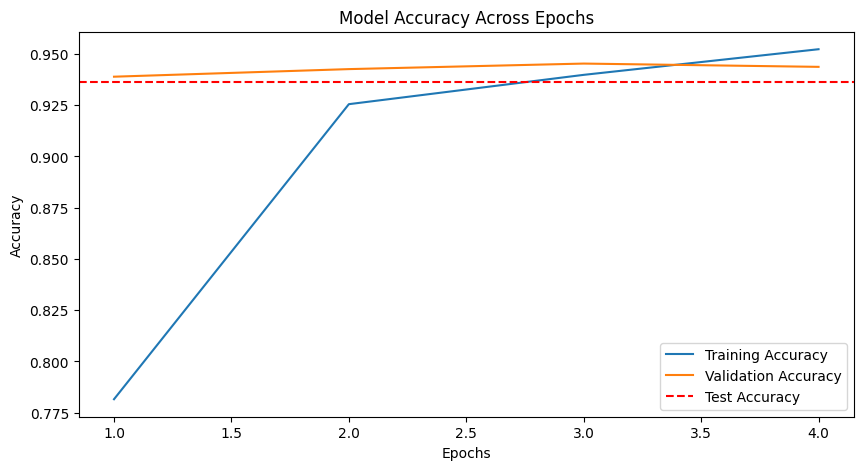

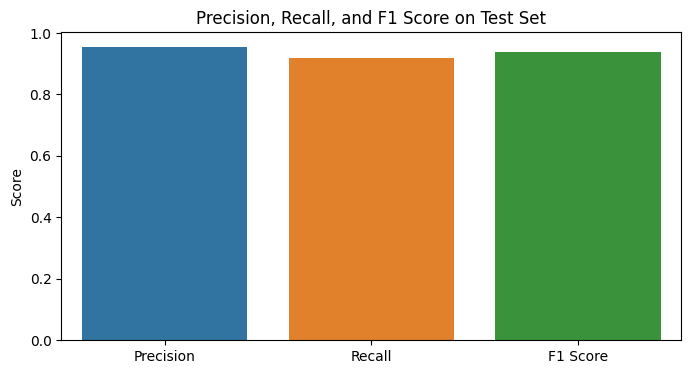

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace with your actual results
epochs = [1, 2, 3, 4]
training_accuracy = [0.7816, 0.9255, 0.9398, 0.9523]
validation_accuracy = [0.9389, 0.9426, 0.9453, 0.9437]
test_accuracy = 0.9363

precision = [0.9546]
recall = [0.9199]
f1_score = [0.9369]

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
sns.lineplot(epochs, training_accuracy, label='Training Accuracy')
sns.lineplot(epochs, validation_accuracy, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across Epochs')
plt.legend()
plt.show()

# Plotting precision, recall, and F1 score
plt.figure(figsize=(8, 4))
sns.barplot(x=['Precision', 'Recall', 'F1 Score'], y=[precision[0], recall[0], f1_score[0]])
plt.title('Precision, Recall, and F1 Score on Test Set')
plt.ylabel('Score')
plt.show()


# Compulsion (BERT Model For Datset Labelled By Ontology (enriched) and Manual)

In [87]:
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data preparation
posts = combined_df['post'].tolist()
labels = combined_df['compulsion'].tolist()  # Replace 'obsession' with 'compulsion' if needed

# Tokenize the data
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encodings = tokenizer(posts, truncation=True, padding=True, max_length=128, return_tensors='np')

# Convert labels to numpy array
labels_np = np.array(labels)

# Split data into training and test sets
train_encodings, test_encodings, train_labels, test_labels = train_test_split(encodings['input_ids'], labels_np, test_size=0.2, random_state=42)

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
accuracy_scores = []
loss_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(train_encodings)):
    # Split the data for this fold
    train_fold_encodings = {'input_ids': train_encodings[train_index]}
    val_fold_encodings = {'input_ids': train_encodings[val_index]}
    train_fold_labels = train_labels[train_index]
    val_fold_labels = train_labels[val_index]

    # Load BERT model
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Train the model
    history = model.fit(train_fold_encodings, train_fold_labels, validation_data=(val_fold_encodings, val_fold_labels), epochs=4, batch_size=32)

    # Evaluate the model on the validation set
    val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_fold_encodings, val_fold_labels)
    accuracy_scores.append(val_accuracy)
    loss_scores.append(val_loss)
    precision_scores.append(val_precision)
    recall_scores.append(val_recall)
    f1_scores.append(2 * (val_precision * val_recall) / (val_precision + val_recall))

# Print average scores across all folds
print("Cross-Validation Results:")
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Loss:", np.mean(loss_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1-Score:", np.mean(f1_scores))

# Prepare test set
test_encodings = {'input_ids': test_encodings}

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_encodings, test_labels)
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

# Print test set scores
print("Test Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1_score}")

# Save the fine-tuned model
model.save_pretrained('/Users/areejnasser/Desktop/cross-val 3')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2754s 12s/step - loss: 0.4071 - accuracy: 0.8000 - precision_12: 0.9556 - recall_12: 0.3389 - val_loss: 0.2109 - val_accuracy: 0.9219 - val_precision_12: 0.9191 - val_recall_12: 0.7865
Epoch 2/4
236/236 [==============================] - 2704s 11s/step - loss: 0.1731 - accuracy: 0.9347 - precision_12: 0.9602 - recall_12: 0.8126 - val_loss: 0.1708 - val_accuracy: 0.9368 - val_precision_12: 0.9652 - val_recall_12: 0.8000
Epoch 3/4
236/236 [==============================] - 2733s 12s/step - loss: 0.1361 - accuracy: 0.9507 - precision_12: 0.9706 - recall_12: 0.8593 - val_loss: 0.1400 - val_accuracy: 0.9480 - val_precision_12: 0.9470 - val_recall_12: 0.8596
Epoch 4/4
59/59 [==============================] - 205s 3s/step - loss: 0.1416 - accuracy: 0.9458 - precision_12: 0.9524 - recall_12: 0.8462


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2771s 12s/step - loss: 0.5102 - accuracy: 0.7403 - precision_13: 0.9091 - recall_13: 0.1269 - val_loss: 0.2316 - val_accuracy: 0.9251 - val_precision_13: 0.9251 - val_recall_13: 0.8030
Epoch 2/4
236/236 [==============================] - 2703s 11s/step - loss: 0.2031 - accuracy: 0.9247 - precision_13: 0.9515 - recall_13: 0.7830 - val_loss: 0.1541 - val_accuracy: 0.9469 - val_precision_13: 0.9660 - val_recall_13: 0.8439
Epoch 3/4
236/236 [==============================] - 2709s 11s/step - loss: 0.1477 - accuracy: 0.9453 - precision_13: 0.9682 - recall_13: 0.8410 - val_loss: 0.1260 - val_accuracy: 0.9554 - val_precision_13: 0.9809 - val_recall_13: 0.8606
Epoch 4/4
59/59 [==============================] - 241s 4s/step - loss: 0.1393 - accuracy: 0.9533 - precision_13: 0.9395 - recall_13: 0.8941


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 3287s 14s/step - loss: 0.4710 - accuracy: 0.7772 - precision_14: 0.9531 - recall_14: 0.2422 - val_loss: 0.2334 - val_accuracy: 0.9118 - val_precision_14: 0.9290 - val_recall_14: 0.7646
Epoch 2/4
236/236 [==============================] - 2848s 12s/step - loss: 0.1864 - accuracy: 0.9321 - precision_14: 0.9543 - recall_14: 0.8041 - val_loss: 0.1542 - val_accuracy: 0.9384 - val_precision_14: 0.9787 - val_recall_14: 0.8124
Epoch 3/4
236/236 [==============================] - 3010s 13s/step - loss: 0.1361 - accuracy: 0.9501 - precision_14: 0.9727 - recall_14: 0.8514 - val_loss: 0.1429 - val_accuracy: 0.9421 - val_precision_14: 0.9524 - val_recall_14: 0.8496
Epoch 4/4
59/59 [==============================] - 209s 4s/step - loss: 0.1479 - accuracy: 0.9426 - precision_14: 0.9673 - recall_14: 0.8372


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2768s 12s/step - loss: 0.4098 - accuracy: 0.7967 - precision_15: 0.9473 - recall_15: 0.3197 - val_loss: 0.2238 - val_accuracy: 0.9139 - val_precision_15: 0.8900 - val_recall_15: 0.8062
Epoch 2/4
236/236 [==============================] - 2638s 11s/step - loss: 0.1818 - accuracy: 0.9320 - precision_15: 0.9483 - recall_15: 0.8108 - val_loss: 0.1750 - val_accuracy: 0.9325 - val_precision_15: 0.9493 - val_recall_15: 0.8134
Epoch 3/4
236/236 [==============================] - 2608s 11s/step - loss: 0.1289 - accuracy: 0.9523 - precision_15: 0.9669 - recall_15: 0.8659 - val_loss: 0.1766 - val_accuracy: 0.9352 - val_precision_15: 0.8826 - val_recall_15: 0.8986
Epoch 4/4
59/59 [==============================] - 199s 3s/step - loss: 0.1773 - accuracy: 0.9378 - precision_15: 0.9191 - recall_15: 0.8641


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
236/236 [==============================] - 2612s 11s/step - loss: 0.4456 - accuracy: 0.7843 - precision_16: 0.9646 - recall_16: 0.2630 - val_loss: 0.2181 - val_accuracy: 0.9107 - val_precision_16: 0.9313 - val_recall_16: 0.7614
Epoch 2/4
236/236 [==============================] - 2893s 12s/step - loss: 0.1761 - accuracy: 0.9352 - precision_16: 0.9582 - recall_16: 0.8110 - val_loss: 0.1294 - val_accuracy: 0.9516 - val_precision_16: 0.9780 - val_recall_16: 0.8596
Epoch 3/4
236/236 [==============================] - 3235s 14s/step - loss: 0.1281 - accuracy: 0.9506 - precision_16: 0.9698 - recall_16: 0.8556 - val_loss: 0.1303 - val_accuracy: 0.9570 - val_precision_16: 0.9374 - val_recall_16: 0.9193
Epoch 4/4
59/59 [==============================] - 200s 3s/step - loss: 0.1324 - accuracy: 0.9506 - precision_16: 0.9838 - recall_16: 0.8509
Cross-Validation Results:
Average Accuracy: 0.9460256099700928
Average Loss: 0.14771717190742492
Average Precision: 0.9523924350738525
Average Re

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


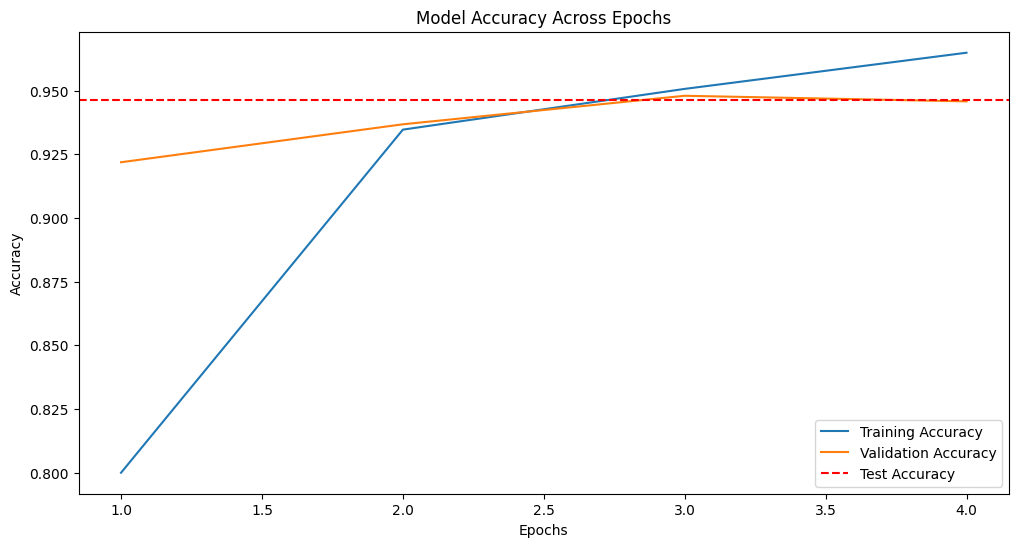

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


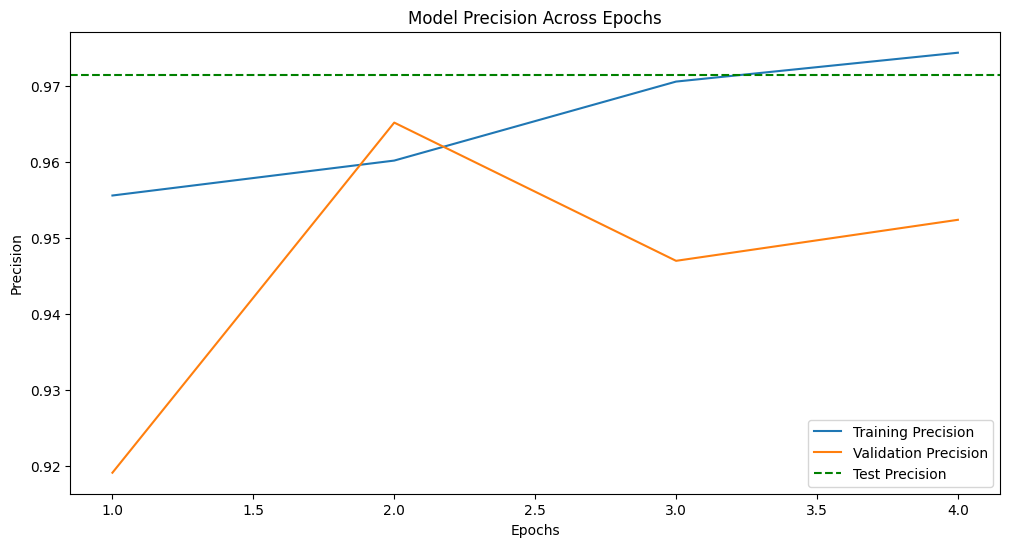

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


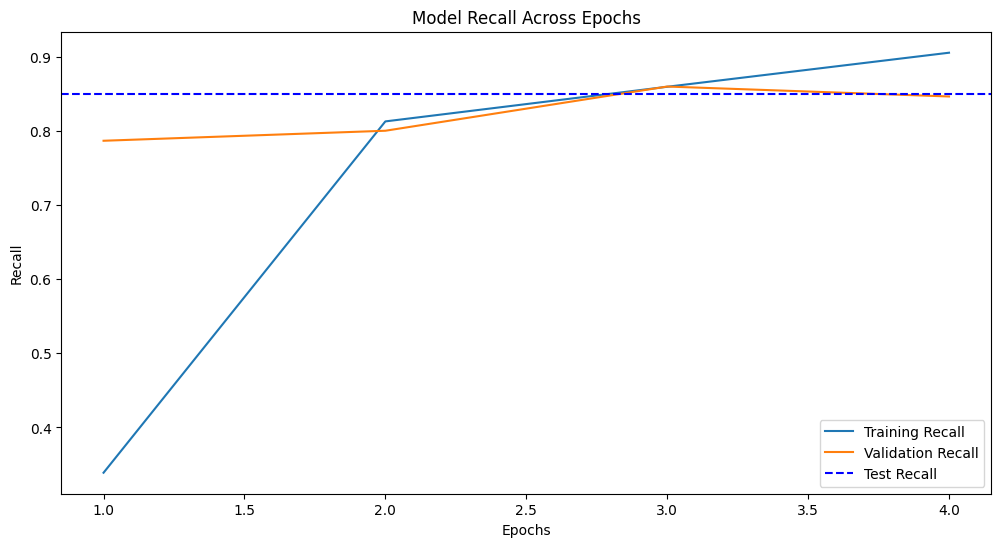

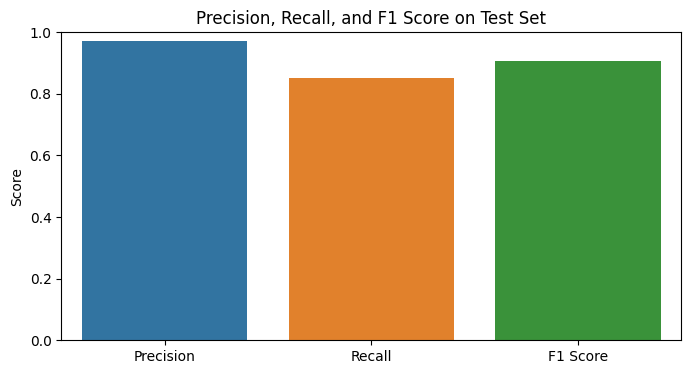

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Training and validation metrics for each epoch
epochs = [1, 2, 3, 4]
training_accuracy = [0.8000, 0.9347, 0.9507, 0.9649]
validation_accuracy = [0.9219, 0.9368, 0.9480, 0.9458]
training_precision = [0.9556, 0.9602, 0.9706, 0.9744]
validation_precision = [0.9191, 0.9652, 0.9470, 0.9524]
training_recall = [0.3389, 0.8126, 0.8593, 0.9052]
validation_recall = [0.7865, 0.8000, 0.8596, 0.8462]

# Test set results
test_accuracy = 0.9464513659477234
test_precision = 0.9714285731315613
test_recall = 0.8500000238418579
test_f1_score = 0.9066666809717813

# Plotting accuracy, precision, and recall across epochs
plt.figure(figsize=(12, 6))
sns.lineplot(epochs, training_accuracy, label='Training Accuracy')
sns.lineplot(epochs, validation_accuracy, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(epochs, training_precision, label='Training Precision')
sns.lineplot(epochs, validation_precision, label='Validation Precision')
plt.axhline(y=test_precision, color='g', linestyle='--', label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Model Precision Across Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(epochs, training_recall, label='Training Recall')
sns.lineplot(epochs, validation_recall, label='Validation Recall')
plt.axhline(y=test_recall, color='b', linestyle='--', label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Model Recall Across Epochs')
plt.legend()
plt.show()

# Plotting precision, recall, and F1 score on test set
plt.figure(figsize=(8, 4))
sns.barplot(x=['Precision', 'Recall', 'F1 Score'], y=[test_precision, test_recall, test_f1_score])
plt.title('Precision, Recall, and F1 Score on Test Set')
plt.ylabel('Score')
plt.ylim(0, 1)  # Adjust the y-axis limit
plt.show()
